### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df['smoking_history'].value_counts() * 100 / len(df)

No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: smoking_history, dtype: float64

In [8]:
smoking_history_features = pd.get_dummies(df['smoking_history'], drop_first = True)
smoking_history_features.head()

,current,ever,former,never,not current
0,0,0,0,1,0
1,0,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0


In [9]:
df_2 = pd.concat([df.drop('smoking_history', axis = 1), smoking_history_features], axis = 1)
df_2.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,current,ever,former,never,not current
0,Female,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
1,Female,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0
2,Male,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0
3,Female,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0
4,Male,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0


<Axes: >

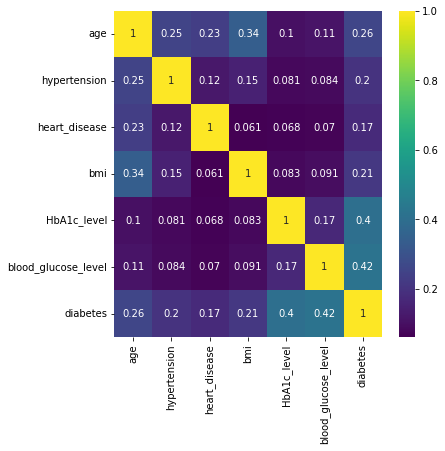

In [10]:
plt.figure(figsize = (6, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

<Axes: >

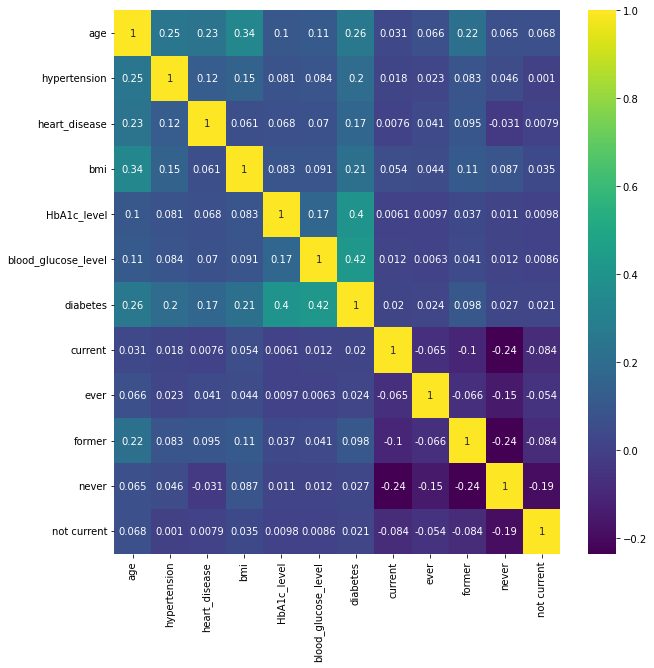

In [11]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_2.corr(), annot = True, cmap = 'viridis')

In [12]:
df.drop('smoking_history', axis = 1, inplace = True)
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.1+ MB


In [14]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [15]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99982 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   bmi                  99982 non-null  float64
 5   HbA1c_level          99982 non-null  float64
 6   blood_glucose_level  99982 non-null  int64  
 7   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.9+ MB


In [16]:
gender_features = pd.get_dummies(df['gender'], drop_first = True)
gender_features

,Male
0,0
1,0
2,1
3,0
4,1
...,...
99995,0
99996,0
99997,1
99998,0


In [17]:
df = pd.concat([df, gender_features], axis = 1)
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Male
0,Female,80.0,0,1,25.19,6.6,140,0,0
1,Female,54.0,0,0,27.32,6.6,80,0,0
2,Male,28.0,0,0,27.32,5.7,158,0,1
3,Female,36.0,0,0,23.45,5.0,155,0,0
4,Male,76.0,1,1,20.14,4.8,155,0,1
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,27.32,6.2,90,0,0
99996,Female,2.0,0,0,17.37,6.5,100,0,0
99997,Male,66.0,0,0,27.83,5.7,155,0,1
99998,Female,24.0,0,0,35.42,4.0,100,0,0


<Axes: >

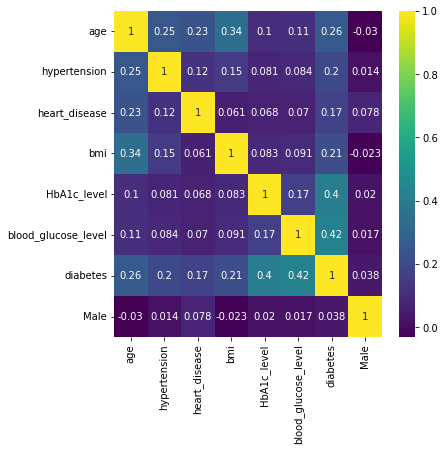

In [18]:
plt.figure(figsize = (6, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [19]:
df[df['age'] < 1]['age']

155      0.08
218      0.56
241      0.88
268      0.16
396      0.16
         ... 
99452    0.32
99536    0.40
99629    0.64
99778    0.32
99911    0.32
Name: age, Length: 911, dtype: float64

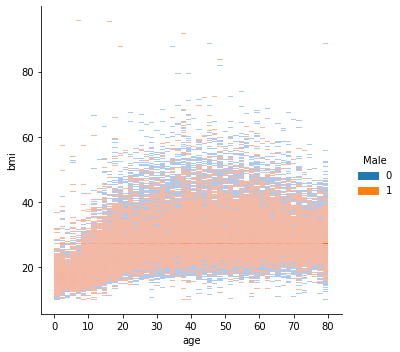

In [20]:
sns.displot(df, x = 'age', y = 'bmi', hue = 'Male')

<Axes: xlabel='heart_disease', ylabel='Count'>

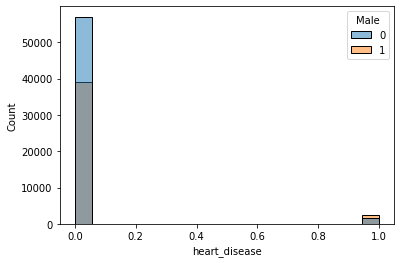

In [21]:
sns.histplot(df, x = 'heart_disease', hue = 'Male')

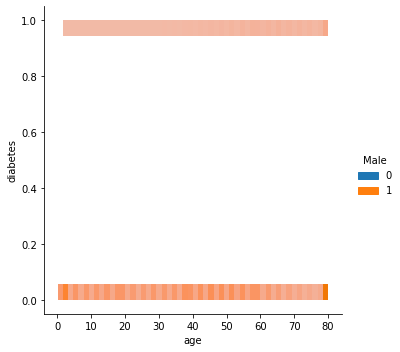

In [22]:
sns.displot(df, x = 'age', y = 'diabetes', hue = 'Male')

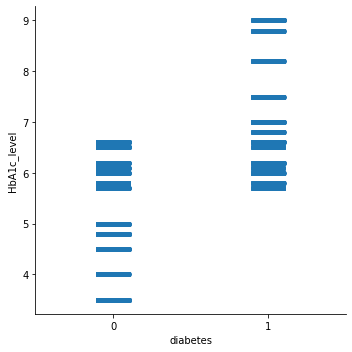

In [23]:
sns.catplot(df, y = 'HbA1c_level', x = 'diabetes')

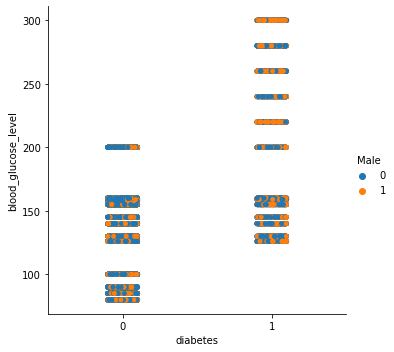

In [24]:
sns.catplot(df, y = 'blood_glucose_level', x = 'diabetes', hue = 'Male')

<Axes: xlabel='diabetes', ylabel='Count'>

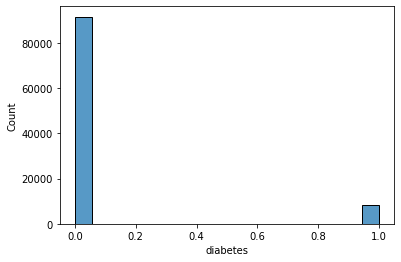

In [25]:
sns.histplot(df, x = 'diabetes')

In [26]:
df.drop('gender', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99982 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  99982 non-null  float64
 1   hypertension         99982 non-null  int64  
 2   heart_disease        99982 non-null  int64  
 3   bmi                  99982 non-null  float64
 4   HbA1c_level          99982 non-null  float64
 5   blood_glucose_level  99982 non-null  int64  
 6   diabetes             99982 non-null  int64  
 7   Male                 99982 non-null  uint8  
dtypes: float64(3), int64(4), uint8(1)
memory usage: 8.2 MB


In [27]:
len(df[df['diabetes'] == 1]) / len(df)

0.08501530275449581

In [28]:
len(df[df['diabetes'] == 0]) / len(df)

0.9149846972455042

### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop('diabetes', axis = 1)
y = df['diabetes']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 35)

### Model Training and Testing using Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
dtc = DecisionTreeClassifier()

In [34]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
predictions = dtc.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [36]:
print(confusion_matrix(y_test, predictions))

[[22258   633]
 [  569  1536]]


In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22891
           1       0.71      0.73      0.72      2105

    accuracy                           0.95     24996
   macro avg       0.84      0.85      0.85     24996
weighted avg       0.95      0.95      0.95     24996



### Model Training and Testing using Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier()

In [40]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
predictions = rfc.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
print(confusion_matrix(y_test, predictions))

[[22766   125]
 [  676  1429]]


In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22891
           1       0.92      0.68      0.78      2105

    accuracy                           0.97     24996
   macro avg       0.95      0.84      0.88     24996
weighted avg       0.97      0.97      0.97     24996



# Testing Own Data

In [44]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'Male'],
      dtype='object')

In [45]:
custom_data = {
    'age': 23,
    'hypertension': 0,
    'heart_disease': 0,
    'bmi': 19.0,
    'HbA1c_level': 6.0,
    'blood_glucose_level': 95,
    'Male': 1
}
custom_data

{'age': 23,
 'hypertension': 0,
 'heart_disease': 0,
 'bmi': 19.0,
 'HbA1c_level': 6.0,
 'blood_glucose_level': 95,
 'Male': 1}

In [46]:
custom_data = pd.DataFrame(custom_data, index = [0])
custom_data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Male
0,23,0,0,19.0,6.0,95,1


In [47]:
custom_data.iloc[0]

age                    23.0
hypertension            0.0
heart_disease           0.0
bmi                    19.0
HbA1c_level             6.0
blood_glucose_level    95.0
Male                    1.0
Name: 0, dtype: float64

In [48]:
dtc.predict(custom_data)

array([0])

In [49]:
rfc.predict(custom_data)

array([0])